In [1]:
import pandas as pd
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import matplotlib.pyplot as plt

In [2]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
sds_data = pd.read_csv('../data/sds_ds_text.csv')
sds_non_data = pd.read_csv('../data/sds_nds_text.csv')

In [ ]:
sds_data

In [ ]:
sds_non_data.head(2)

#### Adding textblob to nlp pipeline

In [ ]:
nlp.components

In [ ]:
nlp.add_pipe("spacytextblob")

In [ ]:
nlp.components

### Sentiment Analysis for datascience relevant episodes

In [ ]:
# Getting the polarity
def sentiment_analysis(text):
    global sds_data
    
    if isinstance(text, float): # added this if statement because due to [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
        return 0.0  # Return neutral sentiment for float values
    doc = nlp(text)
    polarity = doc._.blob.polarity
    return polarity

In [ ]:
# Getting the subjectivity
def subjectivity_analysis(text):
    global sds_data
    
    if isinstance(text, float): # added this if statement because due to [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
        return 0.0  # Return neutral sentiment for float values
    doc = nlp(text)
    subjectivity = doc._.blob.subjectivity
    return subjectivity

In [ ]:
# Getting the subjectivity
def assessment_analysis(text):
    global sds_data
    
    if isinstance(text, float): # added this if statement because due to [E1041] Expected a string, Doc, or bytes as input, but got: <class 'float'>
        return 0.0  # Return neutral sentiment for float values
    doc = nlp(text)
    assessment = doc._.assessments
    return assessment

In [ ]:
sds_data['sentiments'] = sds_data['episode_split_text'].apply(sentiment_analysis)

In [ ]:
sds_data['subjectivity'] = sds_data['episode_split_text'].apply(subjectivity_analysis)

In [ ]:
sds_data['assessment'] = sds_data['episode_split_text'].apply(assessment_analysis)

In [ ]:
def getAnalysis(score):
    
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
       

In [ ]:
sds_data['result_score'] = sds_data['sentiments'].apply(getAnalysis)

In [ ]:
sds_data

In [ ]:
sds_data = sds_data[~(((sds_data['guest_name'] == ' Kirill Eremenko ') & (sds_data['host_episode'] == 'Jon Krohn')) & ((sds_data['guest_name'] == ' Jon Krohn ') & (sds_data['host_episode'] == 'Kirril Eremenko')))]

In [ ]:
sds_data['episode_number'].unique()

In [ ]:
Kirill

In [ ]:
sds_data["assessment"].loc[20]

In [ ]:
def tuple_extractor(row):
    words = [t[0] for t in row]
    return words

In [ ]:
sds_data['words'] = sds_data['assessment'].apply(tuple_extractor)

In [ ]:
sds_data['words'].loc[10]

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
sds_data.to_csv('../data/sds_ds_sentiments.csv', index = False)

In [ ]:
sds_data

In [ ]:
sds_data

In [ ]:
len(sds_data['episode_split_text'])

In [ ]:
sds_data['result_score'].value_counts()

In [ ]:
# Let’s plot the results
import matplotlib.pyplot as plt
%matplotlib inline

#plt.rcParams['figure.figsize'] = [10, 8]

for index, episode_split_text in enumerate(sds_sentiments.index):
    x = sds_sentiments.sentiments.loc[episode_split_text]
    y = sds_sentiments.subjectivity.loc[episode_split_text]
    plt.scatter(x, y, color='Red')
    plt.title('Sentiment Analysis', fontsize = 20)
    plt.xlabel('← Negative — — — — — — Positive →', fontsize = 15)
    plt.ylabel('← Facts — — — — — — — Opinions →', fontsize = 15)
    plt.show()

### Sentiments EDA

In [3]:
sds_data = pd.read_csv('../data/sds_ds_sentiments.csv')

In [4]:
sds_data

,episode_name,length_episode,context_episode,guest_name,guest_info,text_episode,episode_number,episode_date,episode_year,episode_day,host_episode,class,episode_split_text,speaker,sentiments,subjectivity,result_score,assessment
0,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,2016-09-10,2016,Saturday,Kirill Eremenko,Database,This is episode number one with ex-chemical en...,Kirill,0.257792,0.589713,Positive,"[(['inspiring'], 0.5, 1.0, None), (['successfu..."
1,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,2016-09-10,2016,Saturday,Kirill Eremenko,Database,"Hey guys, welcome to the Podcast. I’ve got Rub...",Kirill,0.566667,0.730000,Positive,"[(['welcome'], 0.8, 0.9, None), (['super'], 0...."
2,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,2016-09-10,2016,Saturday,Kirill Eremenko,Database,Thank you! Thanks for having me over. I’m doin...,Ruben,0.500000,0.475000,Positive,"[(['thanks'], 0.2, 0.2, None), (['great'], 0.8..."
3,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,2016-09-10,2016,Saturday,Kirill Eremenko,Database,Awesome. It’s great to hear you and for those ...,Kirill,0.463636,0.671667,Positive,"[(['awesome'], 1.0, 1.0, None), (['great'], 0...."
4,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,2016-09-10,2016,Saturday,Kirill Eremenko,Database,"Yeah sure. So, I’m the senior manager of analy...",Ruben,0.369388,0.546372,Positive,"[(['sure'], 0.5, 0.8888888888888888, None), ([..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49443,"Contextual A.I. for Adapting to Adversaries, ...",81,Data Science Artificial Intelligence,Matar Haller,"Subscribe on Website, Apple Podcasts, Spotify,...",Jon Krohn:\t00:00:05\tThis is episode number 6...,683,2023-05-30,2023,Tuesday,Jon Krohn,Artificial Intelligence,"Yeah, right. Yeah, as I mean, it actually, it ...",Jon Krohn,0.199031,0.563316,Positive,"[(['right'], 0.2857142857142857, 0.53571428571..."
49444,"Contextual A.I. for Adapting to Adversaries, ...",81,Data Science Artificial Intelligence,Matar Haller,"Subscribe on Website, Apple Podcasts, Spotify,...",Jon Krohn:\t00:00:05\tThis is episode number 6...,683,2023-05-30,2023,Tuesday,Jon Krohn,Artificial Intelligence,Happy to.,Matar Haller,0.800000,1.000000,Positive,"[(['happy'], 0.8, 1.0, None)]"
49445,"Contextual A.I. for Adapting to Adversaries, ...",81,Data Science Artificial Intelligence,Matar Haller,"Subscribe on Website, Apple Podcasts, Spotify,...",Jon Krohn:\t00:00:05\tThis is episode number 6...,683,2023-05-30,2023,Tuesday,Jon Krohn,Artificial Intelligence,"Nice. Well, yeah, so you mentioned potentially...",Jon Krohn,0.320000,0.615000,Positive,"[(['nice'], 0.6, 1.0, None), (['potentially'],..."
49446,"Contextual A.I. for Adapting to Adversaries, ...",81,Data Science Artificial Intelligence,Matar Haller,"Subscribe on Website, Apple Podcasts, Spotify,...",Jon Krohn:\t00:00:05\tThis is episode number 6...,683,2023-05-30,2023,Tuesday,Jon Krohn,Artificial Intelligence,Thank you for having me. This was fascinating ...,Matar Haller,0.500000,0.525000,Positive,"[(['fascinating'], 0.7, 0.8500000000000001, No..."


In [5]:
sds_data['episode_number'].nunique()

451

In [6]:
sds_data = sds_data[~(((sds_data['guest_name'] == ' Kirill Eremenko ') & (sds_data['host_episode'] == 'Kirill Eremenko')) | ((sds_data['guest_name'] == ' Jon Krohn ') & (sds_data['host_episode'] == 'Jon Krohn')))]

In [7]:
Krohn = sds_data[(sds_data['host_episode'] == 'Kirill Eremenko') & (sds_data['guest_name'] == ' Jon Krohn ')]

In [8]:
Kirill = sds_data[(sds_data['host_episode'] == 'Jon Krohn' ) & (sds_data['guest_name'] == ' Kirill Eremenko ')]

In [9]:
sds_data = sds_data[~(((sds_data['host_episode'] == 'Jon Krohn' ) & (sds_data['guest_name'] == ' Kirill Eremenko ')) | ((sds_data['host_episode'] == 'Kirill Eremenko') & (sds_data['guest_name'] == ' Jon Krohn ')))]

In [10]:
sds_data['episode_number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  23,  25,  29,  31,  33,
        35,  37,  39,  41,  43,  45,  47,  49,  51,  53,  55,  57,  59,
        61,  63,  65,  67,  69,  71,  73,  75,  77,  79,  81,  83,  85,
        87,  89,  91,  93,  95,  97,  99, 101, 103, 105, 107, 109, 111,
       115, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141,
       143, 145, 147, 149, 151, 155, 157, 159, 161, 163, 165, 167, 169,
       171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195,
       199, 201, 203, 205, 207, 209, 211, 213, 215, 217, 219, 223, 225,
       227, 229, 231, 233, 235, 237, 239, 241, 243, 245, 247, 249, 251,
       253, 255, 257, 259, 261, 263, 265, 267, 269, 271, 273, 275, 277,
       279, 280, 281, 283, 284, 285, 287, 289, 291, 292, 293, 294, 295,
       297, 299, 301, 303, 304, 305, 307, 309, 311, 313, 315, 317, 319,
       321, 323, 327, 329, 331, 333, 337, 341, 343, 345, 347, 34

In [11]:
sds_data['speaker'].unique()

array(['Kirill', 'Ruben', 'Hadelin', 'Wilson', 'Brendan', 'Dmitry',
       'Xinran', 'Artem', 'Ulf', 'Muhsin', 'Yaw', 'Garth', 'Megan',
       'Damian', 'Greg', 'Paul', 'Richard', 'Colin', 'Jen', 'Ot', 'Ilya',
       'Sinan', 'Sam', 'Kimberly', 'Ben', 'David', 'Josh', nan,
       'Nicholas', 'Deblina', 'Eu Jin', 'Jim', 'Scott', 'Virginia',
       'Jaco', 'Ryan', 'Dan', 'Daniel', 'Erika', 'Risto', 'Caroline',
       'Mark', 'Rachel', 'Ravindran', 'Nadieh', 'Emma', 'Deepak', 'Chris',
       'Andy', 'Beau', 'Nick', 'Tuatini', 'Urie', 'Emanuele', 'Gabor',
       'Matt', 'Eric', 'Neelabh', 'Alex', 'Rico', 'Andrew', 'Eva', 'Ajay',
       'Eugene', 'Tom', 'Jorge', 'Derek', 'Derek Schoettle',
       'Dr. Andreas', 'Josey Parks', 'Josey', 'Kirill Eremenko',
       'Vitaly Dolgov', 'Jason Widjaja', 'Lucy McGowan',
       'Francesco Corea', 'Mary Loubele', 'Mike Taveirne',
       'Sinan Ozdemir', 'Aaron Bare', 'Matt Dancho', 'Nisha Iyer',
       'Tarry Singh', 'Nathan Stephens', 'Leigh Pullen', '

In [12]:
host_sentiments = sds_data[(sds_data['speaker'] == 'Kirill Eremenko') | (sds_data['speaker'] == 'Kirill') | (sds_data['speaker'] == 'Jon Krohn')]

In [13]:
guest_sentiments = sds_data[~((sds_data['speaker'] == 'Kirill Eremenko') | (sds_data['speaker'] == 'Kirill') | (sds_data['speaker'] == 'Jon Krohn'))]

In [14]:
guest_sentiments['speaker'].unique()

array(['Ruben', 'Hadelin', 'Wilson', 'Brendan', 'Dmitry', 'Xinran',
       'Artem', 'Ulf', 'Muhsin', 'Yaw', 'Garth', 'Megan', 'Damian',
       'Greg', 'Paul', 'Richard', 'Colin', 'Jen', 'Ot', 'Ilya', 'Sinan',
       'Sam', 'Kimberly', 'Ben', 'David', 'Josh', nan, 'Nicholas',
       'Deblina', 'Eu Jin', 'Jim', 'Scott', 'Virginia', 'Jaco', 'Ryan',
       'Dan', 'Daniel', 'Erika', 'Risto', 'Caroline', 'Mark', 'Rachel',
       'Ravindran', 'Nadieh', 'Emma', 'Deepak', 'Chris', 'Andy', 'Beau',
       'Nick', 'Tuatini', 'Urie', 'Emanuele', 'Gabor', 'Matt', 'Eric',
       'Neelabh', 'Alex', 'Rico', 'Andrew', 'Eva', 'Ajay', 'Eugene',
       'Tom', 'Jorge', 'Derek', 'Derek Schoettle', 'Dr. Andreas',
       'Josey Parks', 'Josey', 'Vitaly Dolgov', 'Jason Widjaja',
       'Lucy McGowan', 'Francesco Corea', 'Mary Loubele', 'Mike Taveirne',
       'Sinan Ozdemir', 'Aaron Bare', 'Matt Dancho', 'Nisha Iyer',
       'Tarry Singh', 'Nathan Stephens', 'Leigh Pullen', 'Daniel Pullen',
       'Loertscher',

In [15]:
host_sentiments['speaker'].unique()

array(['Kirill', 'Kirill Eremenko', 'Jon Krohn'], dtype=object)

In [16]:
jon_host = Kirill[Kirill['speaker'] == 'Jon Krohn']

In [17]:
Kirill_guest = Kirill[Kirill['speaker'] == 'Kirill Eremenko']

In [18]:
jon_guest = Krohn[Krohn['speaker'] == 'Jon Krohn']

In [19]:
Kirill_host = Krohn[Krohn['speaker'] == 'Kirill Eremenko']

In [20]:
guest_sentiments = pd.concat([guest_sentiments, Kirill_guest])

In [21]:
guest_sentiments = pd.concat([guest_sentiments, jon_guest])

In [22]:
host_sentiments = pd.concat([host_sentiments, Kirill_host])

In [23]:
host_sentiments = pd.concat([host_sentiments, jon_host])

In [24]:
guest_sentiments['episode_number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  23,  25,  29,  31,  33,
        35,  37,  39,  41,  43,  45,  47,  49,  51,  53,  55,  57,  59,
        61,  63,  67,  69,  71,  73,  75,  77,  79,  81,  83,  85,  87,
        89,  91,  93,  95,  97,  99, 101, 103, 105, 107, 109, 111, 115,
       121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145,
       147, 149, 151, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173,
       175, 177, 179, 181, 183, 185, 187, 189, 191, 195, 199, 201, 203,
       205, 207, 209, 211, 213, 215, 217, 219, 225, 227, 229, 231, 233,
       235, 237, 239, 241, 243, 245, 247, 249, 251, 253, 255, 257, 259,
       261, 263, 265, 267, 269, 271, 273, 275, 277, 279, 280, 281, 283,
       284, 285, 287, 289, 291, 292, 293, 294, 295, 297, 299, 301, 303,
       304, 305, 307, 309, 311, 313, 315, 317, 319, 321, 323, 327, 329,
       331, 333, 337, 341, 343, 345, 347, 349, 351, 353, 355, 35

In [25]:
host_sentiments = host_sentiments.sort_values('episode_number').reset_index(drop = True)

In [26]:
guest_sentiments = guest_sentiments.sort_values('episode_number').reset_index(drop = True)

In [27]:
guest_sentiments

,episode_name,length_episode,context_episode,guest_name,guest_info,text_episode,episode_number,episode_date,episode_year,episode_day,host_episode,class,episode_split_text,speaker,sentiments,subjectivity,result_score,assessment
0,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,2016-09-10,2016,Saturday,Kirill Eremenko,Database,Thank you! Thanks for having me over. I’m doin...,Ruben,0.500000,0.475000,Positive,"[(['thanks'], 0.2, 0.2, None), (['great'], 0.8..."
1,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,2016-09-10,2016,Saturday,Kirill Eremenko,Database,Yeah. It was my pleasure. Thanks for inviting me.,Ruben,0.200000,0.200000,Positive,"[(['thanks'], 0.2, 0.2, None)]"
2,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,2016-09-10,2016,Saturday,Kirill Eremenko,Database,I think the easiest is that getting in touch w...,Ruben,0.500000,0.400000,Positive,"[(['definitely'], 0.0, 0.5, None), (['best'], ..."
3,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,2016-09-10,2016,Saturday,Kirill Eremenko,Database,That’s a good question cause I never actually ...,Ruben,0.121429,0.533010,Positive,"[(['good'], 0.7, 0.6000000000000001, None), ([..."
4,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,2016-09-10,2016,Saturday,Kirill Eremenko,Database,Yeah. That’s a good question. It’s hard to rea...,Ruben,0.189417,0.537996,Positive,"[(['good'], 0.7, 0.6000000000000001, None), ([..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26611,"Contextual A.I. for Adapting to Adversaries, ...",81,Data Science Artificial Intelligence,Matar Haller,"Subscribe on Website, Apple Podcasts, Spotify,...",Jon Krohn:\t00:00:05\tThis is episode number 6...,683,2023-05-30,2023,Tuesday,Jon Krohn,Artificial Intelligence,"Yeah, love, yeah. But, but, but I would say th...",Matar Haller,0.244345,0.503274,Positive,"[(['love'], 0.5, 0.6, None), (['kind'], 0.6, 0..."
26612,"Contextual A.I. for Adapting to Adversaries, ...",81,Data Science Artificial Intelligence,Matar Haller,"Subscribe on Website, Apple Podcasts, Spotify,...",Jon Krohn:\t00:00:05\tThis is episode number 6...,683,2023-05-30,2023,Tuesday,Jon Krohn,Artificial Intelligence,"Adversarial actors listen in now. Yeah, so I, ...",Matar Haller,0.239791,0.538230,Positive,"[(['beautiful'], 0.85, 1.0, None), (['mysterio..."
26613,"Contextual A.I. for Adapting to Adversaries, ...",81,Data Science Artificial Intelligence,Matar Haller,"Subscribe on Website, Apple Podcasts, Spotify,...",Jon Krohn:\t00:00:05\tThis is episode number 6...,683,2023-05-30,2023,Tuesday,Jon Krohn,Artificial Intelligence,"Yes. The first question, let's start with, wit...",Matar Haller,0.203791,0.483755,Positive,"[(['first'], 0.25, 0.3333333333333333, None), ..."
26614,"Contextual A.I. for Adapting to Adversaries, ...",81,Data Science Artificial Intelligence,Matar Haller,"Subscribe on Website, Apple Podcasts, Spotify,...",Jon Krohn:\t00:00:05\tThis is episode number 6...,683,2023-05-30,2023,Tuesday,Jon Krohn,Artificial Intelligence,"Oh, absolutely. Insight Data Science is wonder...",Matar Haller,0.402941,0.525630,Positive,"[(['absolutely'], 0.2, 0.9, None), (['wonderfu..."


In [28]:
host_sentiments.to_csv('../data/host_sentiments.csv', index = False)

In [29]:
guest_sentiments.to_csv('../data/guest_sentiments.csv', index = False)

In [30]:
host_sentiments = pd.read_csv('../data/host_sentiments.csv')

In [31]:
guest_sentiments = pd.read_csv('../data/guest_sentiments.csv')

In [33]:
host_sentiments

,episode_name,length_episode,context_episode,guest_name,guest_info,text_episode,episode_number,episode_date,episode_year,episode_day,host_episode,class,episode_split_text,speaker,sentiments,subjectivity,result_score,assessment
0,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,2016-09-10,2016,Saturday,Kirill Eremenko,Database,This is episode number one with ex-chemical en...,Kirill,0.257792,0.589713,Positive,"[(['inspiring'], 0.5, 1.0, None), (['successfu..."
1,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,2016-09-10,2016,Saturday,Kirill Eremenko,Database,So there you go guys. That was Ruben Kogel. I ...,Kirill,0.400000,0.564815,Positive,"[(['enjoyed'], 0.5, 0.7, None), (['very'], 0.2..."
2,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,2016-09-10,2016,Saturday,Kirill Eremenko,Database,Definitely and I will also include the link in...,Kirill,0.410000,0.485000,Positive,"[(['definitely'], 0.0, 0.5, None), (['very', '..."
3,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,2016-09-10,2016,Saturday,Kirill Eremenko,Database,Lovely. Haven’t read the book myself. Definite...,Kirill,0.126667,0.368333,Positive,"[(['lovely'], 0.5, 0.75, None), (['definitely'..."
4,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,2016-09-10,2016,Saturday,Kirill Eremenko,Database,Very very powerful advice there. I just all su...,Kirill,0.324943,0.626269,Positive,"[(['very', 'very', 'powerful'], 0.39, 1.0, Non..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,"Contextual A.I. for Adapting to Adversaries, ...",81,Data Science Artificial Intelligence,Matar Haller,"Subscribe on Website, Apple Podcasts, Spotify,...",Jon Krohn:\t00:00:05\tThis is episode number 6...,683,2023-05-30,2023,Tuesday,Jon Krohn,Artificial Intelligence,Nice. Yeah. So I can see how the evolving regu...,Jon Krohn,0.266667,0.558333,Positive,"[(['nice'], 0.6, 1.0, None), (['important'], 0..."
22712,"Contextual A.I. for Adapting to Adversaries, ...",81,Data Science Artificial Intelligence,Matar Haller,"Subscribe on Website, Apple Podcasts, Spotify,...",Jon Krohn:\t00:00:05\tThis is episode number 6...,683,2023-05-30,2023,Tuesday,Jon Krohn,Artificial Intelligence,Did you know that Anaconda is the world’s most...,Jon Krohn,0.246386,0.566241,Positive,"[(['most'], 0.5, 0.5, None), (['popular'], 0.6..."
22713,"Contextual A.I. for Adapting to Adversaries, ...",81,Data Science Artificial Intelligence,Matar Haller,"Subscribe on Website, Apple Podcasts, Spotify,...",Jon Krohn:\t00:00:05\tThis is episode number 6...,683,2023-05-30,2023,Tuesday,Jon Krohn,Artificial Intelligence,"All right. So Matar, you've given us a interes...",Jon Krohn,0.197852,0.572328,Positive,"[(['right'], 0.2857142857142857, 0.53571428571..."
22714,"Contextual A.I. for Adapting to Adversaries, ...",81,Data Science Artificial Intelligence,Matar Haller,"Subscribe on Website, Apple Podcasts, Spotify,...",Jon Krohn:\t00:00:05\tThis is episode number 6...,683,2023-05-30,2023,Tuesday,Jon Krohn,Artificial Intelligence,"Like, yeah, it's crazy in the US to me that pe...",Jon Krohn,-0.266667,0.333333,Negative,"[(['crazy'], -0.6, 0.9, None), (['few'], -0.2,..."


In [44]:
guest_mean_sentiment = pd.DataFrame(host_sentiments.groupby(['episode_name', 'episode_number', 'guest_name', 'episode_date', 'episode_year', 'class'])['sentiments'].mean()).reset_index()

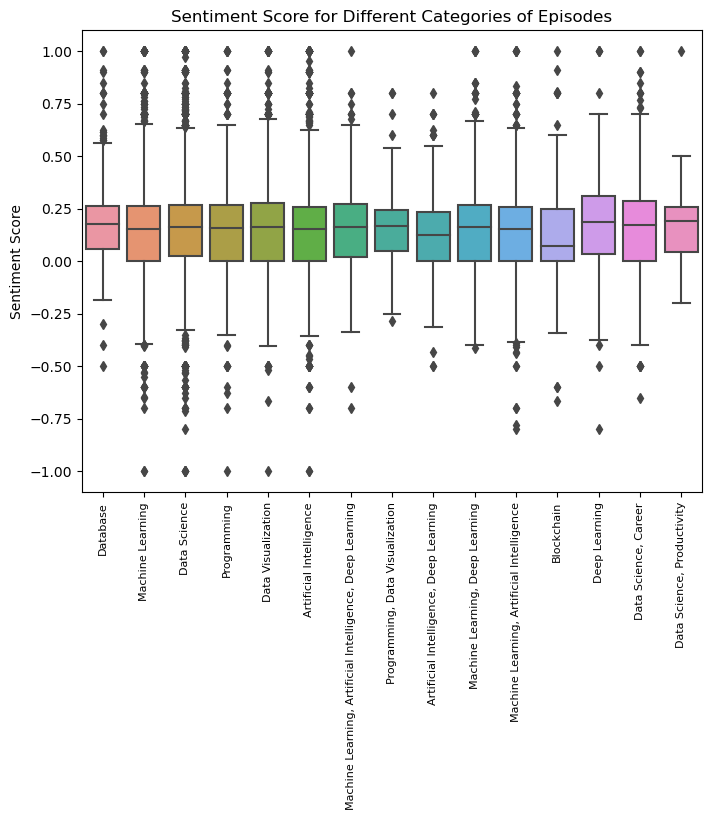

In [52]:
plt.figure(figsize = (8,6))
sns.boxplot(data = guest_sentiments, x ='class', y ='sentiments')
plt.ylabel('Sentiment Score')
plt.xlabel('')
plt.xticks(rotation = 90, fontsize = 8)
plt.title('Sentiment Score for Different Categories of Episodes');

In [57]:
guest_sentiment_score = guest_sentiments.groupby(['class'])['result_score'].value_counts().reset_index(name='count')

In [66]:
guest_sentiment_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   class         45 non-null     object
 1   result_score  45 non-null     object
 2   count         45 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.2+ KB


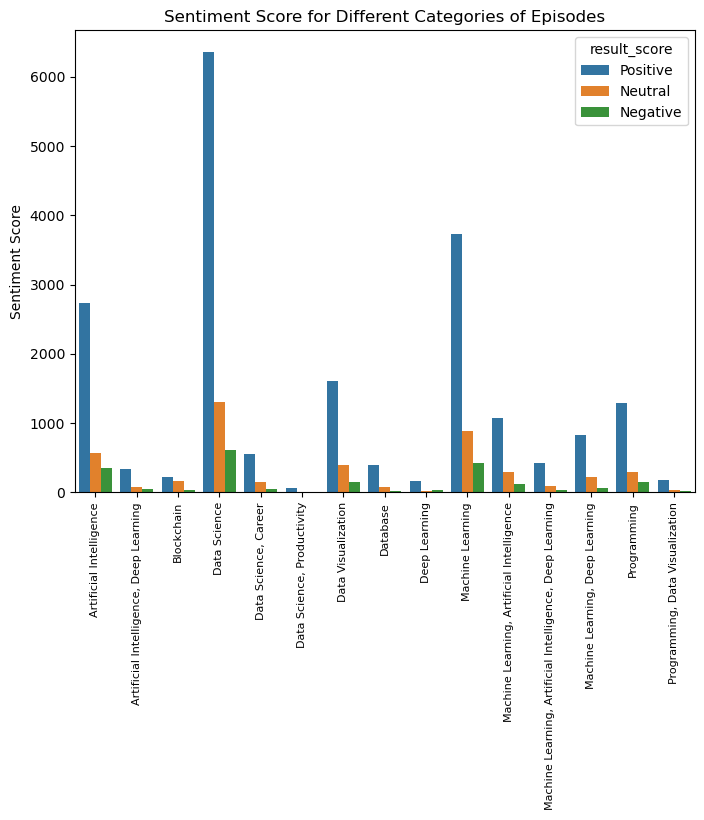

In [76]:
plt.figure(figsize = (8,6))
sns.barplot(guest_sentiment_score, x = 'class', y = 'count', hue = 'result_score')
plt.ylabel('Sentiment Score')
plt.xlabel('')
plt.xticks(rotation = 90, fontsize = 8)
plt.title('Sentiment Score for Different Categories of Episodes');

In [45]:
guest_mean_sentiment

,episode_name,episode_number,guest_name,episode_date,episode_year,class,sentiments
0,Finding the right Data Science Company that ...,77,Richard Downes,2017-08-09,2017,Data Science,0.218903
1,Latest developments in the field of AI and h...,67,Risto Miikkulainen,2017-07-06,2017,"Machine Learning, Artificial Intelligence",0.245564
2,Making the Public Graphically Literate,271,Alberto Cairo,2019-06-19,2019,Data Visualization,0.144068
3,10 Tips from a Data Science Consultant,181,Tim Lafferty,2018-08-08,2018,Machine Learning,0.215364
4,"20 Years in Data Analytics, Entrepreneurship ...",18,Jen Underwood,2017-01-06,2017,Data Science,0.196769
...,...,...,...,...,...,...,...
333,"Women in Stem, Bench Science to Data Science,...",25,Kimberly Deas,2017-02-10,2017,"Programming, Data Visualization",0.237746
334,Working on Apache Spark & R Package Development,211,Javier Luraschi,2018-11-22,2018,Programming,0.186628
335,XGBoost,681,Matt Harrison,2023-05-23,2023,Machine Learning,0.244255
336,Yoga Nidra with Jes Allen,500,Jes Allen,2021-08-26,2021,Data Science,0.260603


In [ ]:
guest_mean_sentiments

<Axes: xlabel='episode_number'>

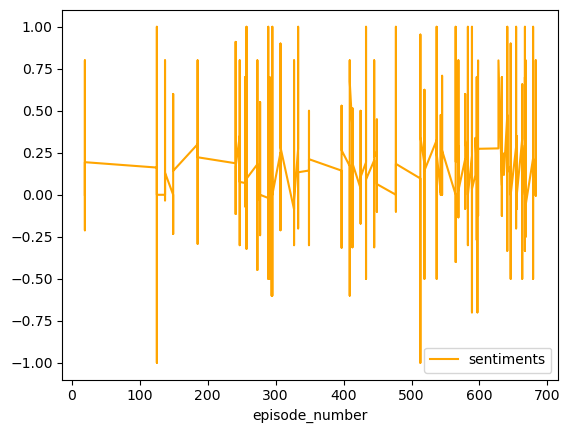

In [34]:
guest_sentiments[guest_sentiments['class']== 'Artificial Intelligence'].plot.line(x='episode_number', y='sentiments', color ='orange')


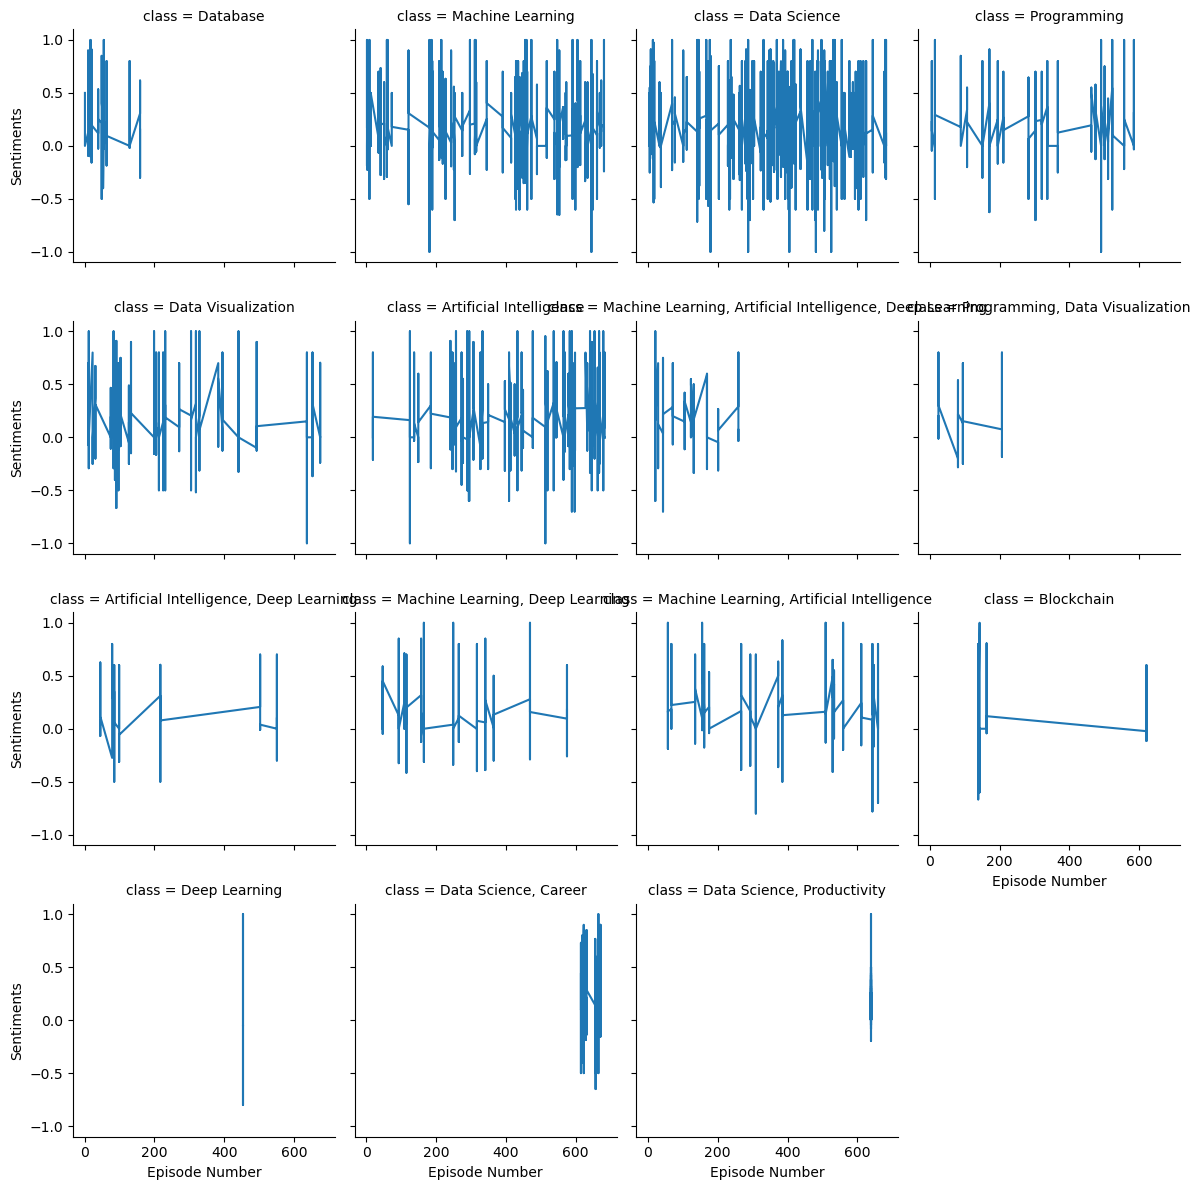

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(guest_sentiments, col='class', col_wrap=4)
g.map(plt.plot, 'episode_number', 'sentiments')
g.set_axis_labels('Episode Number', 'Sentiments')
plt.tight_layout()
plt.show()

In [ ]:
sds_sentiments['episode_number'].unique()

In [ ]:
episode_sentiments = pd.DataFrame(sds_sentiments.groupby(['episode_number', 'episode_name','class', 'episode_year','speaker', 'episode_split_text'])['sentiments'].mean()).reset_index()

### Sentiment Analysis for non-datascience relevant episodes

In [ ]:
sds_non_data['sentiments'] = sds_non_data['episode_split_text'].apply(sentiment_analysis)

In [ ]:
sds_non_data['subjectivity'] = sds_non_data['episode_split_text'].apply(subjectivity_analysis)

In [ ]:
sds_non_data['assessment'] = sds_non_data['episode_split_text'].apply(assessment_analysis)

In [ ]:
sds_non_data['result_score'] = sds_non_data['sentiments'].apply(getAnalysis)

In [ ]:
sds_non_data.to_csv('../data/sds_nds_sentiments.csv', index = False)

In [ ]:
sds_non_data

In [ ]:
sds_non_data['result_score'].value_counts()